In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import func

In [13]:
# Load the dir
futureOBDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresOB/"
futureTradeDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresTrades/"
stockDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/stocks/"

In [14]:
futureData = func.combineFutureData('QWF')
stockData = func.combineStockData('2388')

In [19]:
stockData

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
2022-04-27 09:00:15.039,2022-04-27,90015039,4870.0,60.0,60,4935.0,4915.0,4900.0,4890.0,4880.0,...,2,1,4,2,1,3,1,11,4,24
2022-04-27 09:00:15.060,2022-04-27,90015060,4890.0,1.0,62,4940.0,4935.0,4915.0,4900.0,4890.0,...,1,2,1,4,1,3,1,11,4,24
2022-04-27 09:00:15.098,2022-04-27,90015098,NaN,NaN,62,4950.0,4940.0,4935.0,4900.0,4890.0,...,1,1,2,4,1,3,1,11,4,24
2022-04-27 09:00:15.104,2022-04-27,90015104,NaN,NaN,62,4950.0,4940.0,4935.0,4900.0,4890.0,...,1,1,2,4,1,7,1,11,4,24
2022-04-27 09:00:15.133,2022-04-27,90015133,4890.0,1.0,63,4950.0,4940.0,4935.0,4930.0,4900.0,...,1,1,2,1,4,7,1,11,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,2023-06-30,132453121,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,104,63,45,4,7,1,4,29,40,92
2023-06-30 13:24:57.470,2023-06-30,132457470,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,102,63,47,4,7,1,4,29,40,92
2023-06-30 13:24:57.492,2023-06-30,132457492,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,102,63,47,4,7,2,4,29,40,92
2023-06-30 13:24:58.928,2023-06-30,132458928,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,103,62,47,4,7,2,4,29,40,92


In [16]:
commonDays = func.findCommonDay(stockData, futureData)
stockData, futureData = func.indexStockFuture(stockData, futureData, commonDays)
stockData_downsampled = func.syncStock(stockData, futureData)

In [32]:
stockPrice[stockPrice == 0]

Series([], dtype: float64)

In [18]:
stockPrice = stockData_downsampled['price']
futurePrice = futureData['midQ']

# stockPrice, futurePrice = deleZeroNa(stockPrice, futurePrice)

KeyError: 'price'

In [34]:
gamma = stockPrice[0] / futurePrice[0]
X = np.log(stockPrice / stockPrice[0]) - gamma * np.log(futurePrice / futurePrice[0])

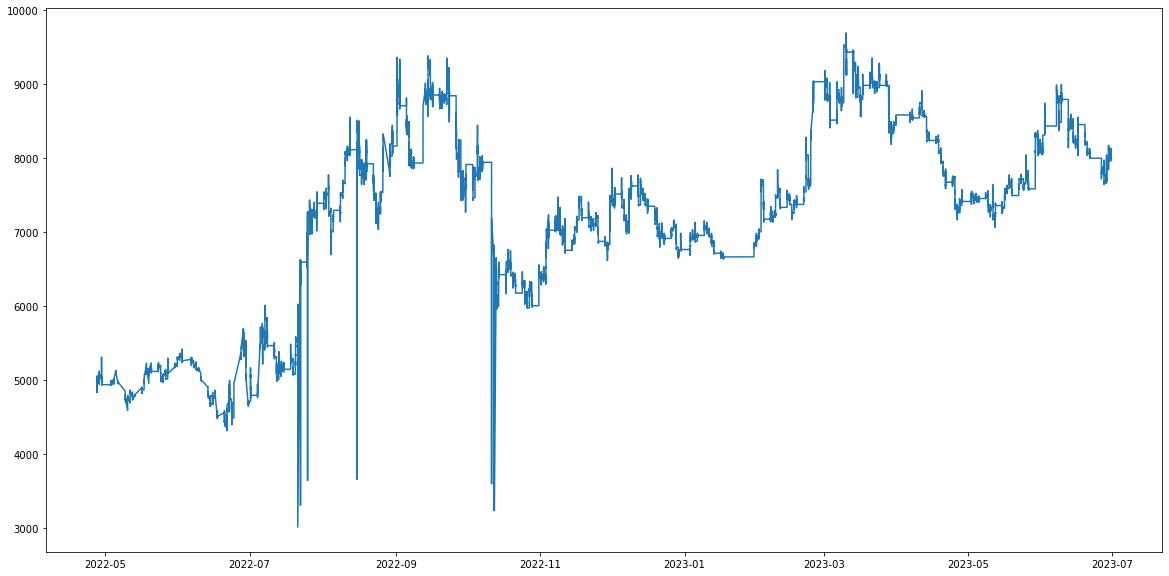

In [33]:
func.pricePlot(stockPrice)

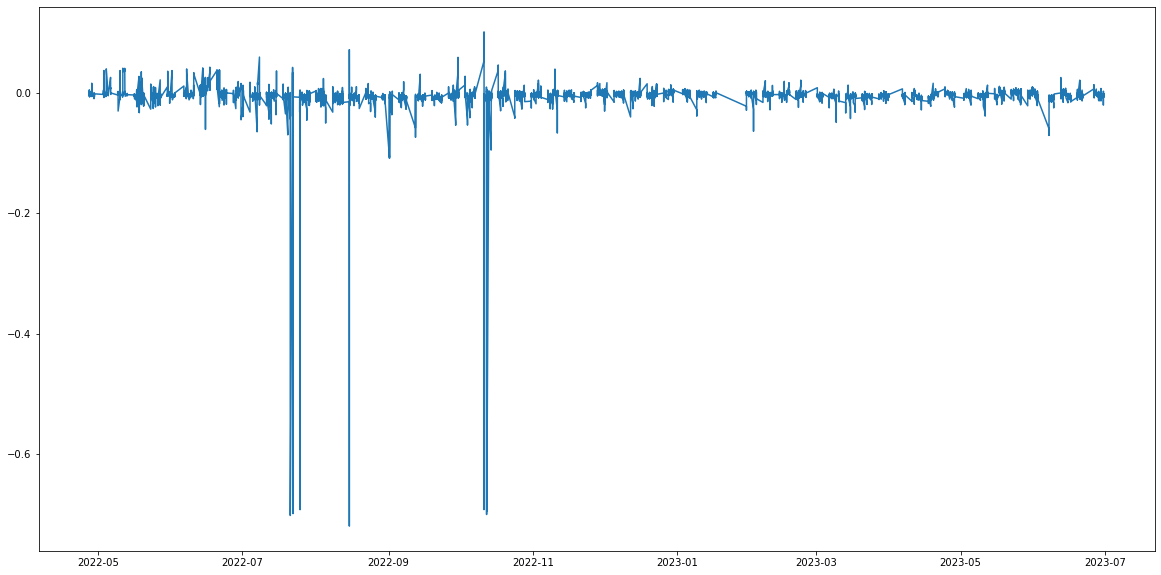

In [35]:
func.pricePlot(X)

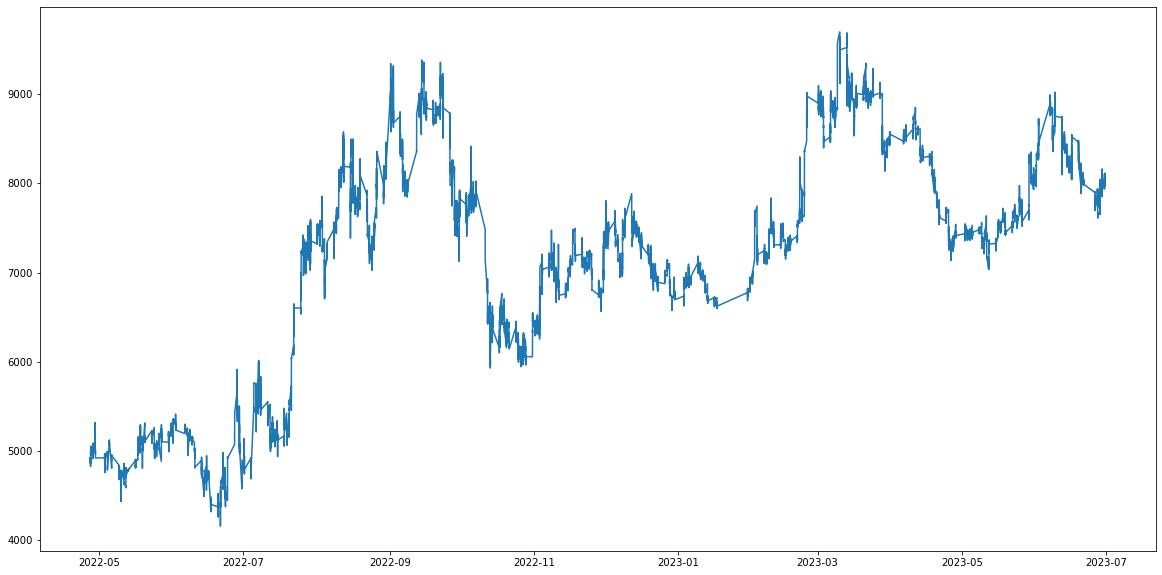

In [23]:
func.pricePlot(futurePrice)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/var/folders/h2/bbgv05t16fb68q0xxfr7_0pw0000gn/T/ipykernel_45603/4009497977.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


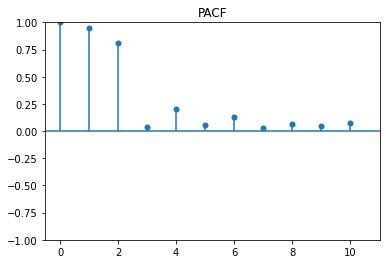

In [8]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pacf = plot_pacf(X, lags=10)
plt.title("PACF")
pacf.show()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


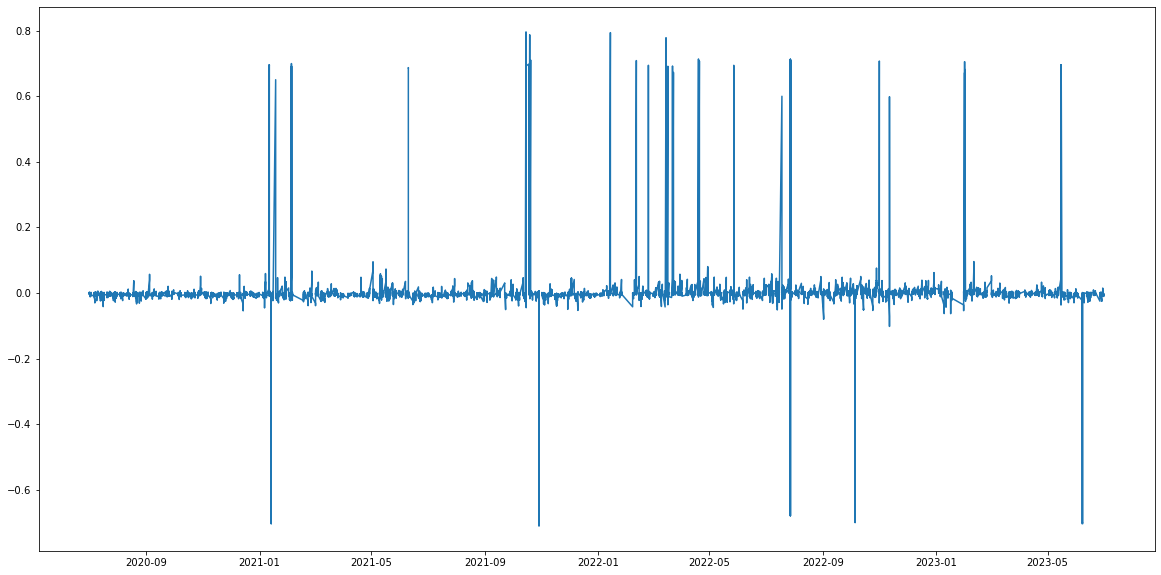

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import func

# Load the dir
futureOBDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresOB/"
futureTradeDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresTrades/"
stockDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/stocks/"

futureData = func.combineFutureData('NAF')
stockData = func.combineStockData('3105')

commonDays = func.findCommonDay(stockData, futureData)
stockData, futureData = func.indexStockFuture(stockData, futureData, commonDays)
stockData_downsampled = func.syncStock(stockData, futureData)
stockPrice = (stockData_downsampled['SP1'] + stockData_downsampled['BP1'])/2
futurePrice = futureData['midQ']

stockPrice, futurePrice = deleZeroNa(stockPrice, futurePrice)

gamma = stockPrice[0] / futurePrice[0]
X = np.log(stockPrice / stockPrice[0]) - gamma * np.log(futurePrice / futurePrice[0])

func.pricePlot(X)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1437: RuntimeWarning: invalid value encountered in subtract
  x -= x.mean()
/var/folders/h2/bbgv05t16fb68q0xxfr7_0pw0000gn/T/ipykernel_45603/2883219149.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


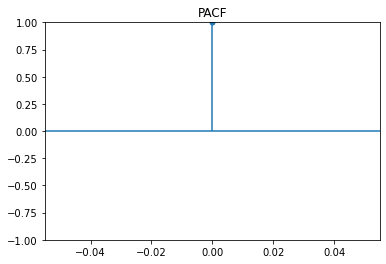

In [49]:
pacf = plot_pacf(X[X<=0.2], lags=10)
plt.title("PACF")
pacf.show()

In [50]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X[X<=0.2], lags=1).fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: SVD did not converge

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:              3939193
Model:                     AutoReg(1)   Log Likelihood            22084526.930
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Wed, 12 Jul 2023   AIC                      -44169047.859
Time:                        19:33:33   BIC                      -44169008.300
Sample:                             1   HQIC                     -44169037.537
                              3939193                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.192e-05   4.55e-07    -26.187      0.000   -1.28e-05    -1.1e-05
y.L1           0.9888   7.52e-05   1.32e+04      0.000       0.989       0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0113           +0.0000j            1.0113            0.0000
-----------------------------------------------------------------------------
"""

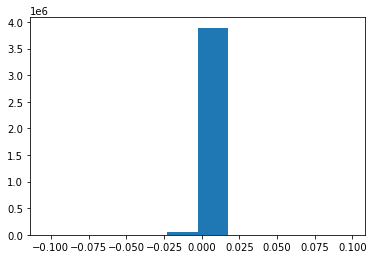

In [ ]:
resi = model.resid
plt.hist(resi, bins=10)
plt.show()

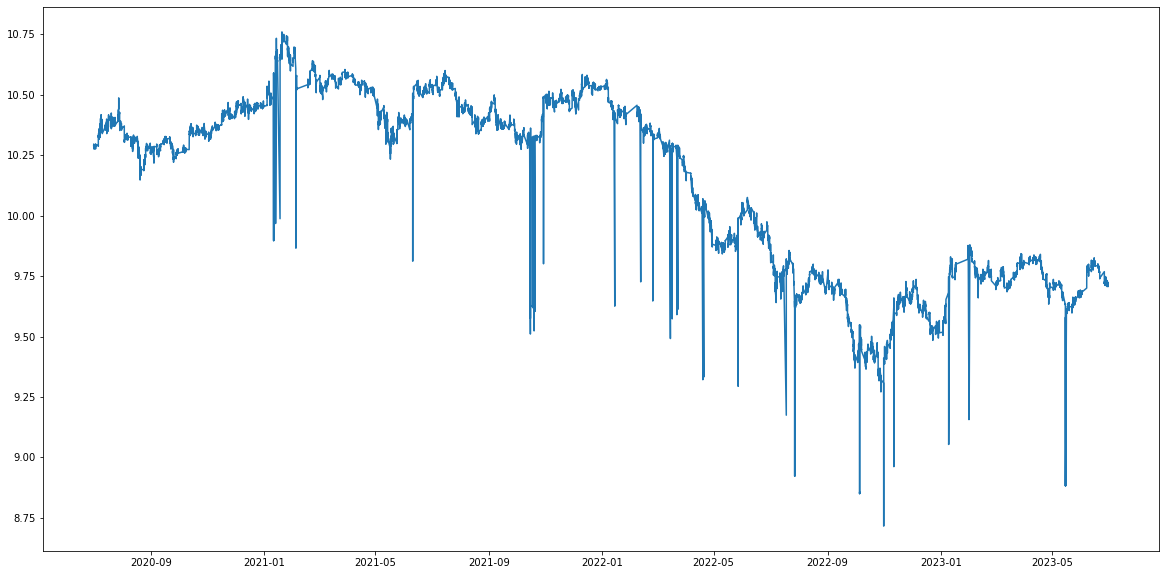

In [ ]:
func.pricePlot(np.log(futurePrice))

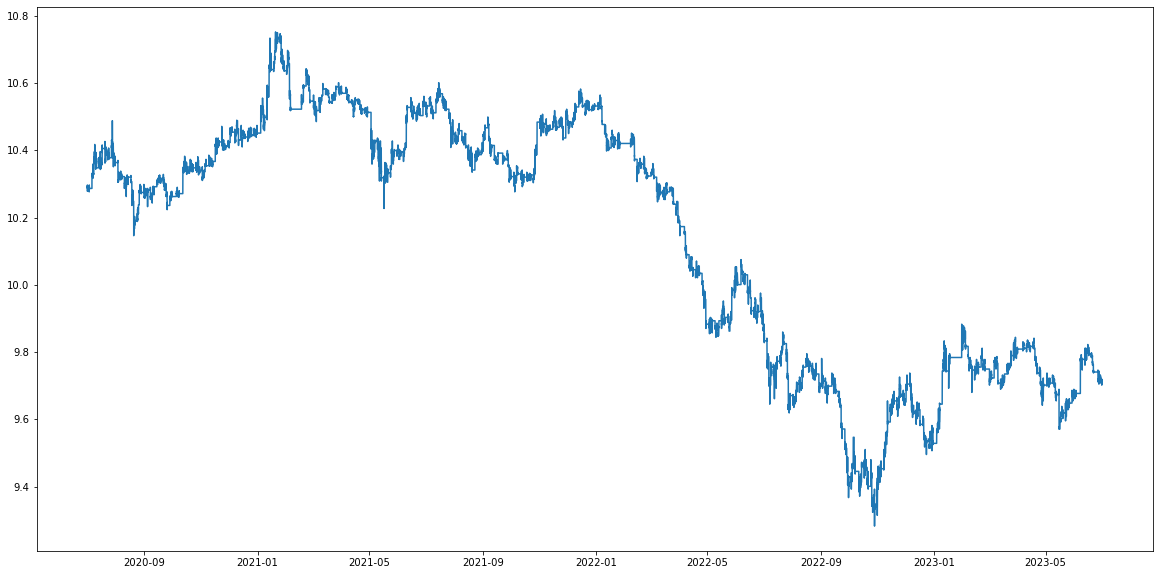

In [ ]:
func.pricePlot(np.log(stockPrice))